# MESSY Analysis of China's Population

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

from scipy import stats as scipystats

from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("ticks")

countries = ["China", "India", "United States", "Pakistan"]

In [456]:
popTotal = pd.read_csv('data/PopulationTotal_All.csv',sep='\t',skiprows=4)
popTotal = popTotal.drop(columns=["Indicator Name", "Indicator Code"]).copy()
popTotal = pd.melt(popTotal, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Total").copy()
popTotal["Year"] = popTotal["Year"].astype(int).copy()
popTotal[popTotal["Population Total"].isna()]

chinaTotal = popTotal[popTotal["Country Name"] == "China"].sort_values("Year")
chinaTotal.head(10)

,Country Name,Country Code,Year,Population Total
38,China,CHN,1960,667070000.0
302,China,CHN,1961,660330000.0
566,China,CHN,1962,665770000.0
830,China,CHN,1963,682335000.0
1094,China,CHN,1964,698355000.0
1358,China,CHN,1965,715185000.0
1622,China,CHN,1966,735400000.0
1886,China,CHN,1967,754550000.0
2150,China,CHN,1968,774510000.0
2414,China,CHN,1969,796025000.0


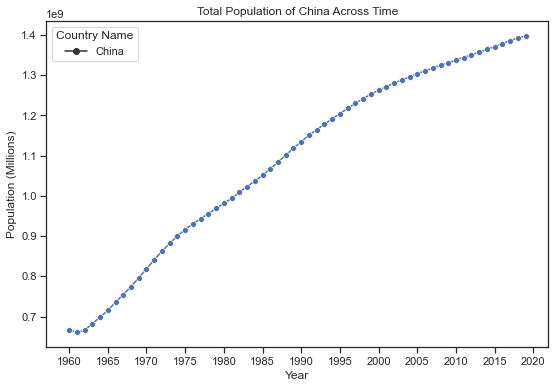

In [457]:
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        style = 'Country Name', 
                        markers = True,
                        dashes = False,
                        markersize = 6
)
"""for ind, label in enumerate(chinaTotalPlot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
"""                     

#plt.locator_params(axis='x', nbins=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Millions)", title="Total Population of China Across Time")
#plt.ylim(0)

plt.show()

## Comparing China's pop to other countries
* Choosing the top 3 most populous countries right now, so the line graph doesn't get too cluttered
* India also has some overpopulation issues
    * Apparently some states have implemented a two-child policy, but it's not as prevalent or as cracked down on as China
    * Interesting to compare
* Though U.S. is 3rd most populus, it's like 1/3 the size of China and India's pop

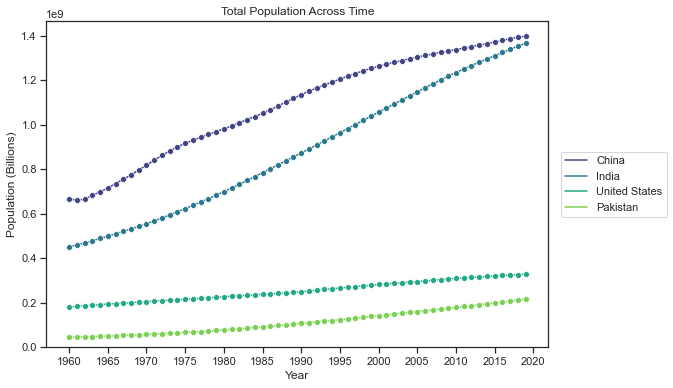

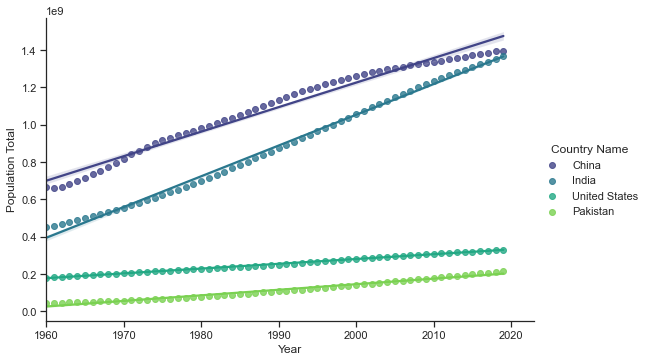

In [458]:
fig, ax = plt.subplots()


df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )


ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)
plt.show()

#seaborn doesn't let you get slope and intercept for reg??
sns.lmplot(x="Year", y="Population Total", data=df, hue="Country Name", palette = 'viridis', hue_order = countries, aspect = 1.5);

## ML regression lines

China
R^2: 0.9749416187485966
Slope: 13142568.769102529
Intercept: -25059270899.462814

India
R^2: 0.9956201264767867
Slope: 16474505.296415677
Intercept: -31895441569.81899

United States
R^2: 0.9963453743349272
Slope: 2567184.157460406
Intercept: -4853639109.717478

Pakistan
R^2: 0.9774667137586983
Slope: 2982501.722228397
Intercept: -5819263497.256729



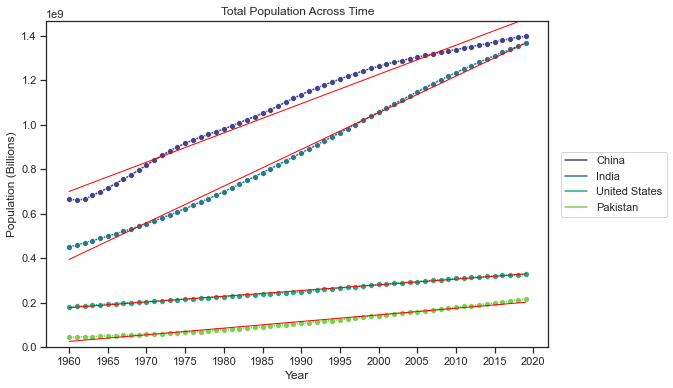

In [459]:
def linReg(name, yearMin, yearMax):
    model=LinearRegression(fit_intercept=True)
    df = popTotal[ (popTotal["Year"] >= yearMin) & (popTotal["Year"] <= yearMax)] 
    df = df[df["Country Name"] == name]
    x = df[["Year"]]
    y = df[["Population Total"]]
    model.fit(x, y)
    score = model.score(x, y)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    return (slope, intercept, score)

fig, ax = plt.subplots()
df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)


for country in countries:
    slope,intercept,score = linReg(country, 1960, 2019)
    print(country + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
    xfit = np.linspace(1960,2019,100) # returns every split 100 nums from 0 to 10
    yfit = slope * xfit + intercept
    plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1)

plt.show()

* Other countries tend to have a more linear population growth
* China's population fluctuates much more than the others
* May be the change in policy effecting population

China 1960-1980s
R^2: 0.9904327799144284
Slope: 17834863.636363633
Intercept: -34318004696.969692

China 1980-2013
R^2: 0.9738445910350151
Slope: 11676994.652406415
Intercept: -22112760705.882347

China 2013-2019
R^2: 0.9985348730094373
Slope: 6999733.082706769
Intercept: -12732522879.699253



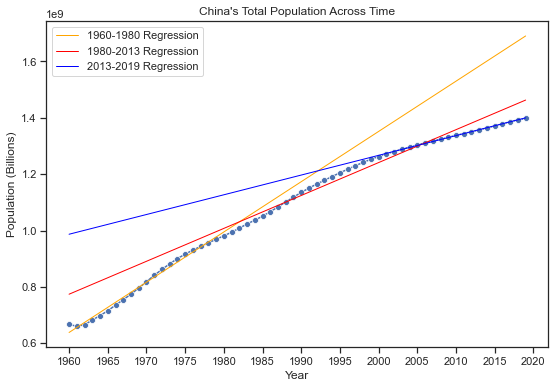

In [460]:
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "Greys"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Billions)", title="China's Total Population Across Time")
#plt.ylim(0)

slope,intercept,score = linReg("China", 1960, 1980)
print("China 1960-1980s" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, color="orange", zorder=2, linewidth=1, label="1960-1980 Regression")

slope,intercept,score = linReg("China", 1980, 2013)
print("China 1980-2013" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1,  label="1980-2013 Regression")

slope,intercept,score = linReg("China", 2000, 2019)
print("China 2013-2019" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit,yfit, color="blue", zorder=2, linewidth=1, label="2013-2019 Regression")

plt.legend()
#plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.show()

* From 1960 - 1980 when there was no restrictive policies, we have the greatest slope / projected growth
* After 1980, the slope gets quite a bit lower and growth seems to die down
* Surprisingly after 2013 when restrictions were loosened, project population growth is even lower than before
* Has not seemed to bounce up yet after seven years
    * Seemed to achieve the goal of reducing population growth
    * But is that necessarily all that good for the future if the aging population has fewer young people to support them?

## Population growth

In [461]:
popGrowth = pd.read_csv('data/PopulationGrowth_All.csv',sep=',',skiprows=4)
popGrowth = popGrowth.drop(columns=["Indicator Name", "Indicator Code", "Unnamed: 65"]).copy()
popGrowth = pd.melt(popGrowth, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Growth").copy()
popGrowth["Year"]= popGrowth["Year"].astype(int).copy()

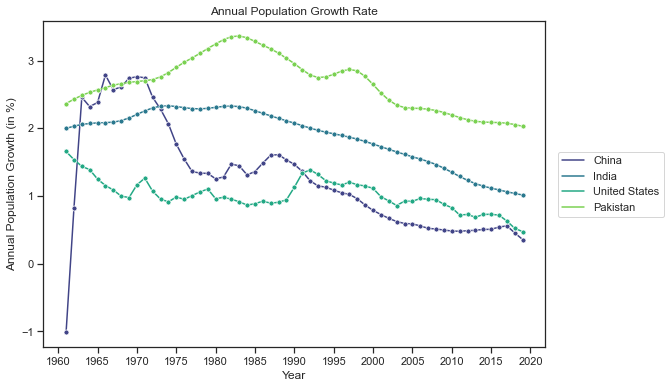

In [462]:

fig, ax = plt.subplots()
chinaGrowthPlot = sns.lineplot(x = 'Year',
                        y = 'Population Growth',
                        data = popGrowth[popGrowth["Country Name"].isin(countries)],
                        hue = 'Country Name', 
                        hue_order = countries, 
                        markers = True,
                        dashes = False,
                        markersize = 5,
                        marker = "o",
                        palette = "viridis"
)                  

#plt.locator_params(axis='x', nbins=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaGrowthPlot.set(xlabel='Year', ylabel="Annual Population Growth (in %)", title="Annual Population Growth Rate")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
#plt.ylim(0)

plt.show()

* Basically each point tells what percent the population grew by last year
    * So if there was 1000 people last year and 1100 people this year, growth rate is 100/1000 = 10% 
* Human population alltogether in the last few years has slowed annual % growth
    * Which makes sense because the population is not going to keep growing exponentially
    * like every year it's 1.02 of the previous
* not sure how useful this information is in comparision
    * China seems to have started off with a high growth rate and it took a drastic dive between 1975 and 1980
    * Which is surprising since you'd think it'd take a more drastic dip after the policy implementation in 1980?
    * What happened between 1975 and 1980??  
* China seems to be in the ball-park of the same growth rate as the U.S. now
    * Which that's better, but they're still gaining more people every year due to the sheer size of their pop, and taking a percentage off that is large
    

In [463]:
# Data is how many males births per every 100 female births
sexRatio = pd.read_csv('data/sex-ratio-at-birth.csv',sep=',',skiprows=0) 
sexRatio = sexRatio.rename(columns={'Sex ratio at birth (male births per female births)':'Sex Ratio', 'Entity' : 'Country Name', 'Code':'Country Code'})

# divide by 100 to get 1:1 ratio
sexRatio['Sex Ratio'] = sexRatio['Sex Ratio'].div(100)
sexRatio

,Country Name,Country Code,Year,Sex Ratio
0,Afghanistan,AFG,1962,1.06
1,Afghanistan,AFG,1967,1.06
2,Afghanistan,AFG,1972,1.06
3,Afghanistan,AFG,1977,1.06
4,Afghanistan,AFG,1982,1.06
...,...,...,...,...
4977,Zimbabwe,ZWE,2013,1.02
4978,Zimbabwe,ZWE,2014,1.02
4979,Zimbabwe,ZWE,2015,1.02
4980,Zimbabwe,ZWE,2016,1.02


(1.0, 1.18)

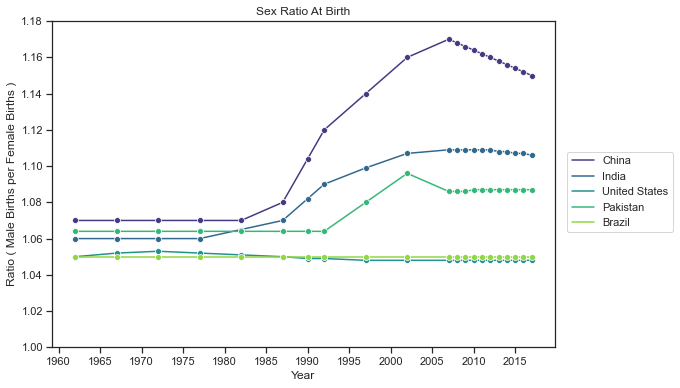

In [464]:
countries2 = ["China", "India", "United States" , "Pakistan", "Brazil"]

fig, ax = plt.subplots()
chinaRatioPlot = sns.lineplot(
                        x = 'Year',
                        y = 'Sex Ratio',
                        data = sexRatio[sexRatio['Country Name'].isin(countries2)],
                        hue = 'Country Name', 
                        hue_order = countries2, 
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "viridis"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaRatioPlot.set(xlabel='Year', ylabel="Ratio ( Male Births per Female Births )", title="Sex Ratio At Birth")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(1,1.18)

* Pretty big leapt in ratio compared to other largely populated countries, at about 1985
* Looking at Pakistan, Brazil and more countries, they mostly stable out the ratio in the last few years
    * See an actual decrease in the ratio for China in the later years

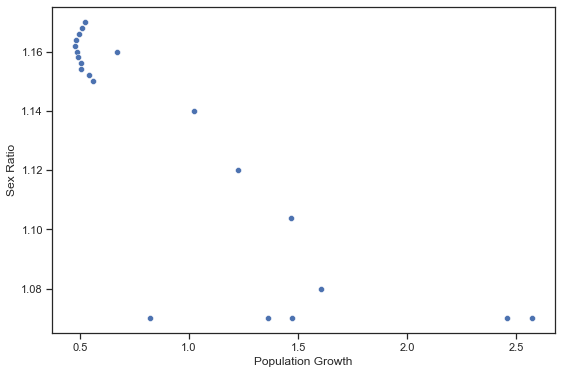

Correlation Coeff:  -0.8406269636143416
P-Value:  0.0000018371


In [465]:
chinaRatio = sexRatio.loc[sexRatio['Country Name'] == 'China'].sort_values("Year").copy()
temp = popGrowth[ (popGrowth["Country Name"] == "China") & popGrowth["Year"].isin(chinaRatio["Year"]) ].sort_values("Year")["Population Growth"].copy()
chinaRatio["Population Growth"] = temp.values
chinaRatio.head(20)

sns.scatterplot(data=chinaRatio, y="Sex Ratio", x="Population Growth")
corr, pval = scipystats.pearsonr(chinaRatio['Population Growth'], chinaRatio['Sex Ratio'])
plt.show()
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

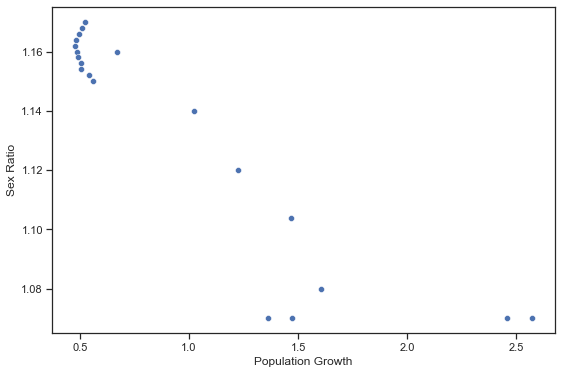

Correlation Coeff:  -0.912047118244702
P-Value:  0.0000000217


In [466]:
chinaRatio = chinaRatio[chinaRatio["Year"] != 1962] # first year, pop growth is really out there

sns.scatterplot(data=chinaRatio, y="Sex Ratio", x="Population Growth")
plt.show()
corr, pval = scipystats.pearsonr(chinaRatio['Population Growth'], chinaRatio['Sex Ratio'])
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

* Seems to be an outlier for the first year. 
    * Decrease in population / negative pop growth that year
    * Not sure if may be hiccup in data collection because it's right when this data starts - 1960s
    * Was afraid the outlier skewed in a way that made data appear more correlated, but no
    * P-val low, correlation not likely by chance
* So apparently for the years that the population growth is higher, there tend to be more female births : male births
    * Somewhat what I expected
    * Policy enacted -> less population growth -> higher number of males to females at birth. 

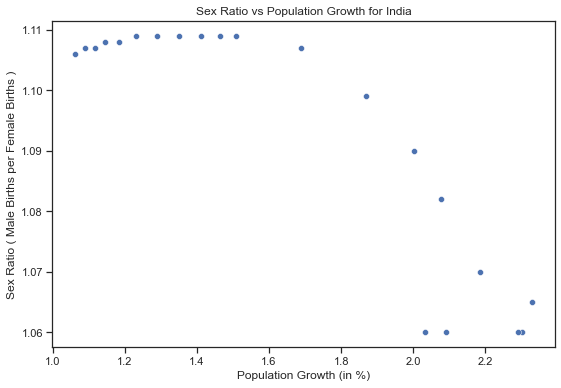

Correlation Coeff:  -0.8894418921581125
P-Value:  0.0000000695


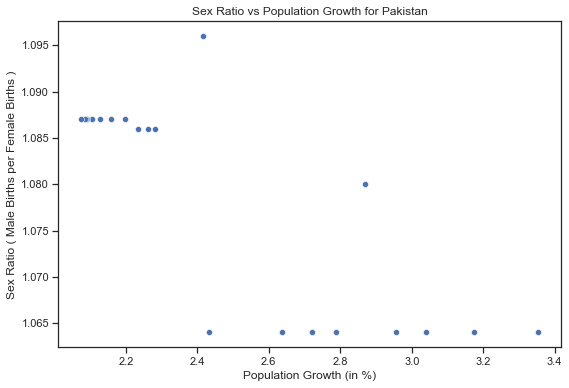

Correlation Coeff:  -0.8106538103906132
P-Value:  0.0000083396


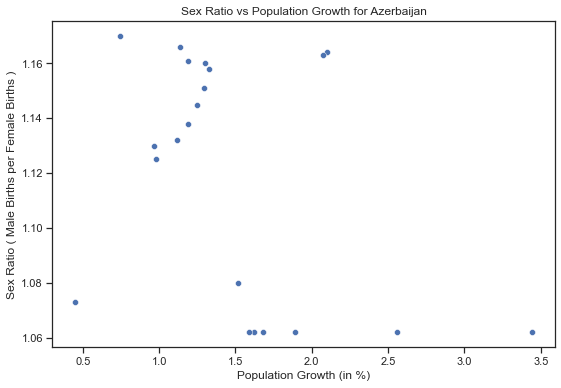

Correlation Coeff:  -0.39795855090376314
P-Value:  0.0739951278


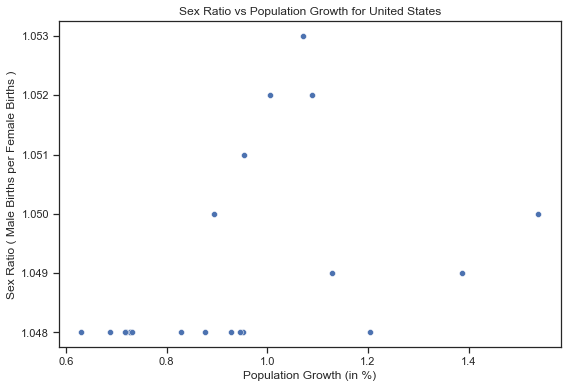

Correlation Coeff:  0.4278230721544639
P-Value:  0.0530307456


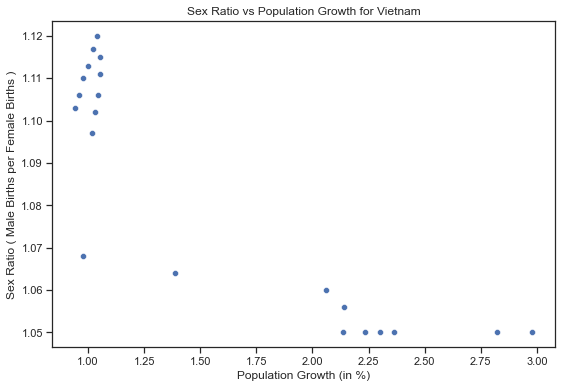

Correlation Coeff:  -0.8769347300774432
P-Value:  0.0000001828


In [506]:
def displayCorrelation(country):
    df = sexRatio.loc[sexRatio['Country Name'] == country].sort_values("Year").copy()
    temp = popGrowth[ (popGrowth["Country Name"] == country) & popGrowth["Year"].isin(indiaRatio["Year"]) ].sort_values("Year")["Population Growth"].copy()
    df["Population Growth"] = temp.values
    df = df.dropna()
    plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Growth")
    plot.set(xlabel='Population Growth (in %)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Growth for " + country)
    plt.show()
    corr, pval = scipystats.pearsonr(df['Population Growth'], df['Sex Ratio'])
    print("Correlation Coeff: ", corr)
    print("P-Value: ", '{:0.10f}'.format(pval))
    
displayCorrelation("India")
displayCorrelation("Pakistan")
displayCorrelation("Azerbaijan")
displayCorrelation("United States")
displayCorrelation("Vietnam")

* Seems to be a strong negative correlation between population growth and sex ratio for India and China 
    * As in the lower the population growth for that year, usually comes along with more male births than female
    * Not causation though, as in more population growth = higher ratio
    * Note that these only really the two countries that have faced pressing overpopulation issues and have some polices in place for limiting number of births have this strong correlation
    * Possible that overpopulation issues, along with government limiting births, and possibly rural poverty as well, all contributed to a culture of preferring male children. There're also factors like different already established stigmas associated with gender across countries that could effect this.

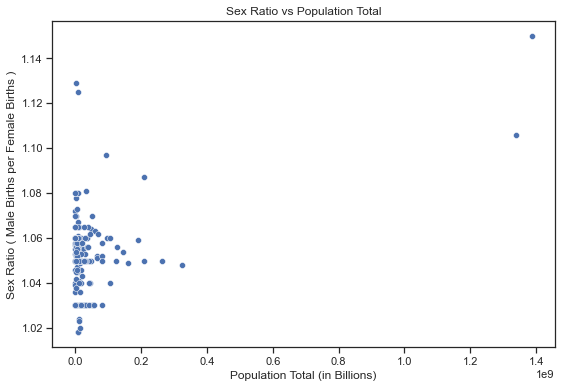

Correlation Coeff:  0.4466201435057299
P-Value:  0.0000000001


In [496]:
df = popTotal[ popTotal["Year"] == 2017 ].copy()
df = pd.merge(df, sexRatio2017, on='Country Code')
df = df.dropna()

plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Total")
plot.set(xlabel='Population Total (in Billions)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Total")
plt.show()

corr, pval = scipystats.pearsonr(df['Population Total'], df['Sex Ratio'])
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

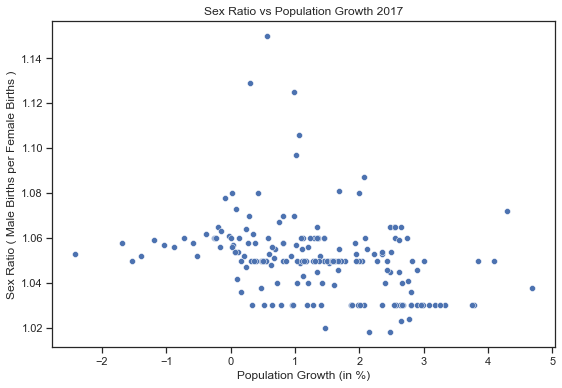

Correlation Coeff:  -0.3344548035462201
P-Value:  0.0000022584


In [505]:
df = popGrowth[ popGrowth["Year"] == 2017 ].copy()
df = pd.merge(df, sexRatio2017, on='Country Code')
df = df.dropna()

plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Growth")
plot.set(xlabel='Population Growth (in %)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Growth 2017")
plt.show()

corr, pval = scipystats.pearsonr(df['Population Growth'], df['Sex Ratio'])
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

## Messing with Geopandas

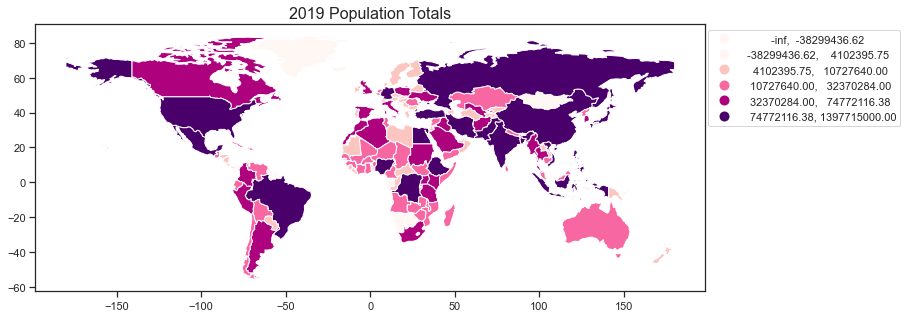

In [469]:
import geopandas
from geopandas import GeoDataFrame

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Country Code', 'gdp_md_est', 'geometry']
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

def makeMap(df, columnName, sch ):
    df = pd.merge(df, world, on='Country Code')
    df = df.set_index('Country Name').join(location.set_index('name')) 
    df = GeoDataFrame(df)

    ax = df.plot(column=columnName, 
                scheme=sch,
               figsize=(12, 8),
               legend=True,cmap='RdPu')
    return ax

pop2019 = popTotal[ popTotal["Year"] == 2019 ].copy()
ax = makeMap(pop2019, "Population Total", "boxplot")

plt.title('2019 Population Totals',fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))
plt.show()

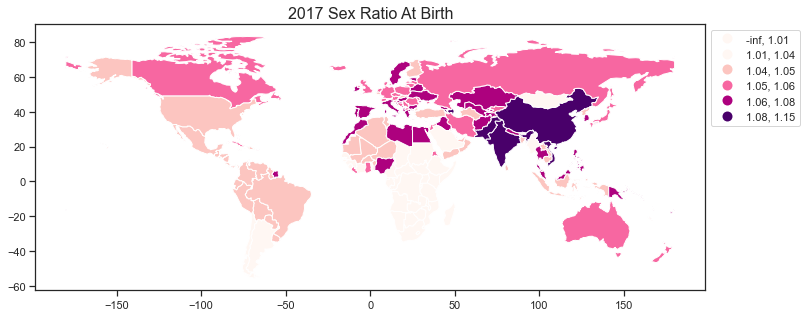

In [470]:
sexRatio2017 = sexRatio[ sexRatio["Year"] == 2017 ].copy()

ax = makeMap(sexRatio2017, "Sex Ratio", "boxplot")
plt.title('2017 Sex Ratio At Birth', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
plt.show()


* According to this map plot, since I'm doing it with 'boxplot' 
    * China, India, Pakistan, and like 2 other countries are in the outliers section for sex ratio at birth, past 75 percentile and max 
    * Showing just how out there the ratio is compared to everywhere else

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 20 to 4981
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  194 non-null    object 
 1   Country Code  193 non-null    object 
 2   Year          194 non-null    int64  
 3   Sex Ratio     194 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ KB


<AxesSubplot:>

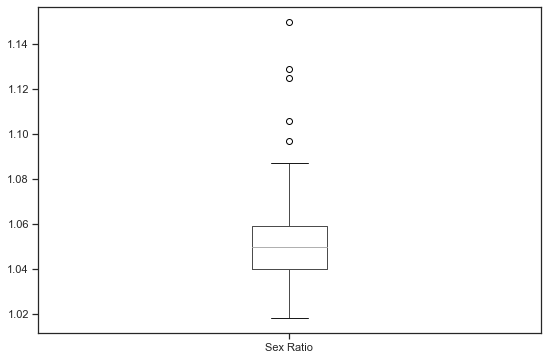

In [471]:
sexRatio2017.info() # across 193 different countries
sexRatio2017.boxplot( column =['Sex Ratio'], grid = False) # yep, it's the highest one right now above 1.14

In [501]:
sexRatio2017[sexRatio2017["Sex Ratio"] > 1.08].sort_values("Sex Ratio")

,Country Name,Country Code,Year,Sex Ratio
4835,Uzbekistan,UZB,2017,1.081
3512,Pakistan,PAK,2017,1.087
4898,Vietnam,VNM,2017,1.097
2100,India,IND,2017,1.106
250,Azerbaijan,AZE,2017,1.125
166,Armenia,ARM,2017,1.129
836,China,CHN,2017,1.150


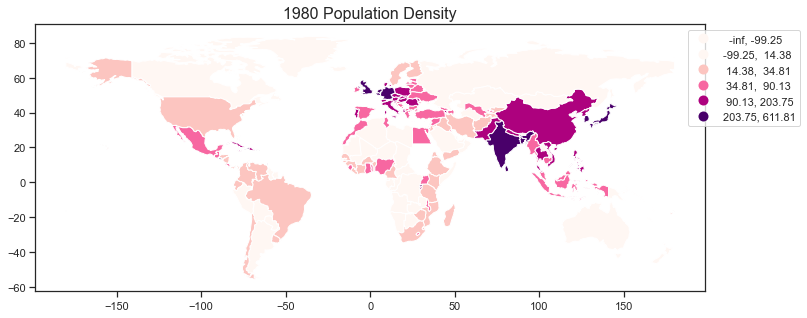

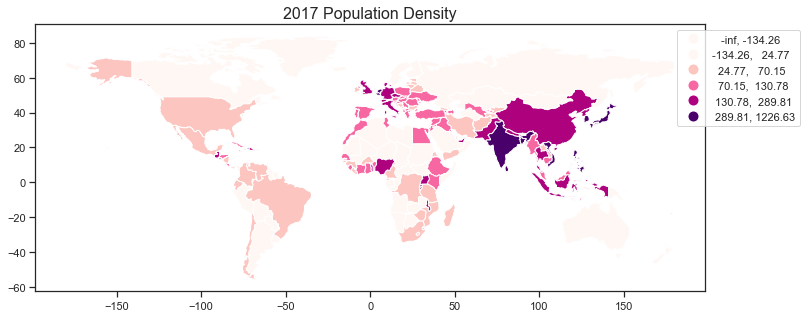

In [488]:
popDensity = pd.read_csv('data/PopulationDensity.csv',sep=',',skiprows=3) 

popDensity = popDensity.drop(columns=["Indicator Name", "Indicator Code", "Unnamed: 65"]).copy()
popDensity = pd.melt(popDensity, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Density").copy()
popDensity["Year"]= popDensity["Year"].astype(int).copy()

popDensity

ax = makeMap(popDensity[popDensity["Year"] == 1980], "Population Density", "boxplot")
plt.title('1980 Population Density', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
plt.show()

ax = makeMap(popDensity[popDensity["Year"] == 2017], "Population Density", "boxplot")
plt.title('2017 Population Density', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
plt.show()


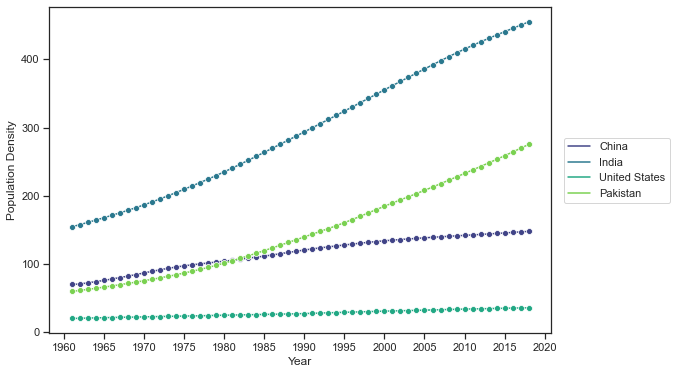

In [492]:
fig, ax = plt.subplots()
pl = sns.lineplot(
                        x = 'Year',
                        y = 'Population Density',
                        data = popDensity[popDensity['Country Name'].isin(countries)],
                        hue = 'Country Name', 
                        hue_order = countries, 
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "viridis"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)

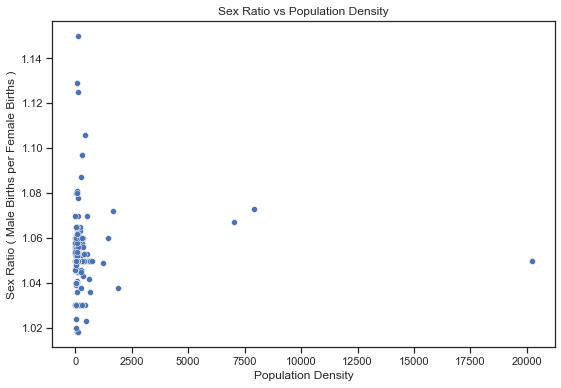

Correlation Coeff:  0.055091859385033984
P-Value:  0.4478723017


In [497]:
df = popDensity[ popDensity["Year"] == 2017 ].copy()
df = pd.merge(df, sexRatio2017, on='Country Code')
df = df.dropna()

plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Density")
plot.set(xlabel='Population Density', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Density")
plt.show()

corr, pval = scipystats.pearsonr(df['Population Density'], df['Sex Ratio'])
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

# Under five mortality
* this doesn't particularly tell me much since it's including all children under 5
* not sure if it's including the at birth stats or not, not enough info
* also starting from 1990, so that's not too useful either

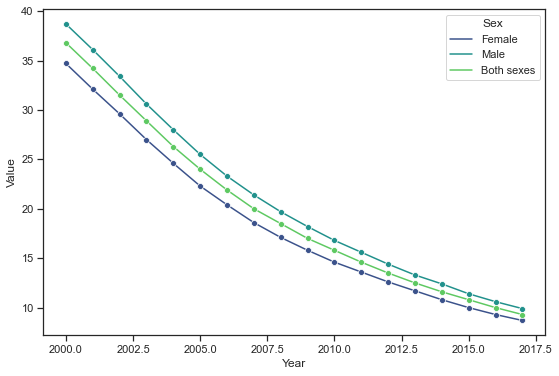

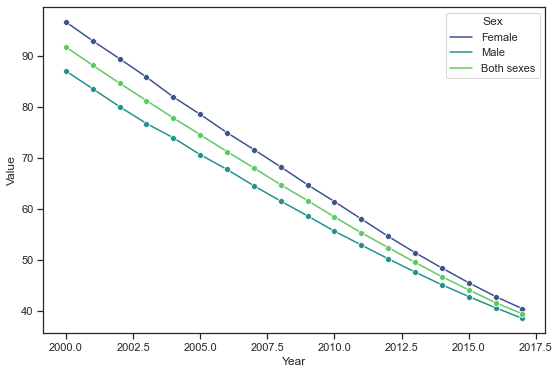

In [472]:
mortalityRate = pd.read_csv('data/UnderFiveMortality.csv',sep='\t',skiprows=2) 

df_plot = sns.lineplot(x = 'Year',
                        y = 'Value',
                        data = mortalityRate[mortalityRate["Country"] == "China"],
                        hue = 'Sex',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6, 
                        palette = 'viridis'
                      )
plt.show()

df_plot = sns.lineplot(x = 'Year',
                        y = 'Value',
                        data = mortalityRate[mortalityRate["Country"] == "India"],
                        hue = 'Sex',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6, 
                        palette = 'viridis'
                      )
plt.show()